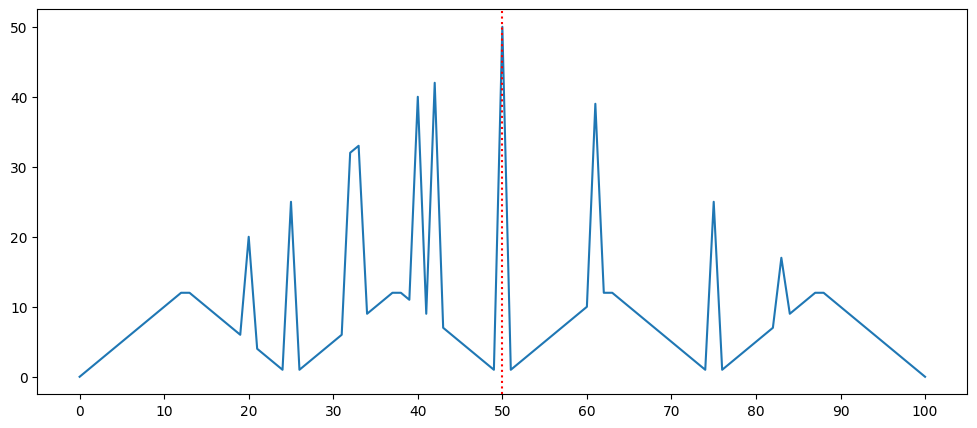

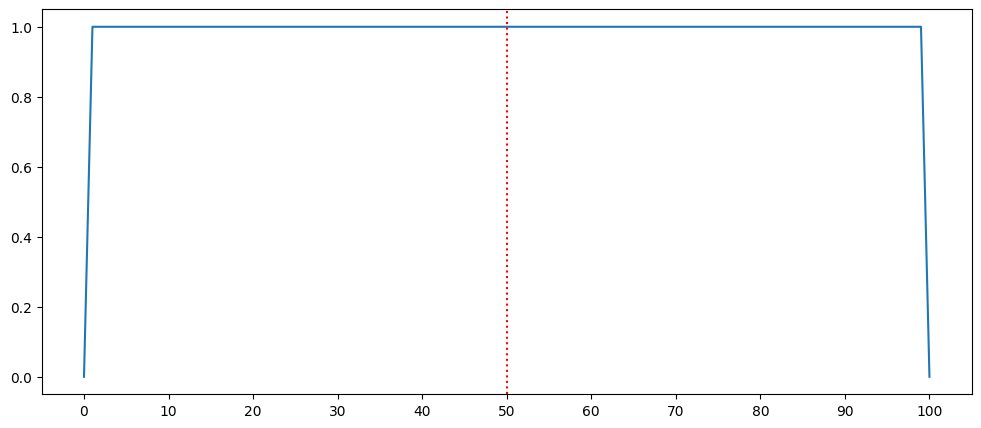

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def get_action_set(n):
    if n == 0 or n == 100:
        return [0]
    else:
        return list(range(1, n+1))

def get_next_states_and_rewards_with_probs(s, a, p):
    if a == 0:
        return [(s, 0, 1)]
    else:
        win_prob = p
        lose_prob = 1 - p

        reward = 0
        if s + a >= 100:
            reward = 1
        return [
            (min(s + a, 100), reward, win_prob),
            (max(s - a, 0), 0, lose_prob)
        ]

pi_store = defaultdict(int)
def pi(s):
    return pi_store[s]

def run(P):  
    theta = 1e-6
    gamma = 1
    V = np.random.rand(101)
    V[0] = 0
    V[100] = 0

    while True:
        delta = 0
        for s in range(1, 101):
            v = V[s]
            actions = get_action_set(s)
            q_values = []
            for a in actions:
                action_value = 0
                next_states = get_next_states_and_rewards_with_probs(s, a, P)
                for i, (s_prime, reward, prob) in enumerate(next_states):
                    action_value += prob * (reward + gamma * V[s_prime])
                q_values.append(action_value)
            V[s] = max(q_values)
            pi_store[s] = actions[np.argmax(q_values)]
            delta = max(delta, np.abs(v - V[s]))
        if delta < theta:
            break

    policy = np.zeros(101)
    for s in range(1, 100):
        policy[s] = pi(s)

    plt.figure(figsize=(12, 5))
    plt.plot(policy)
    plt.axvline(x=50, color='red', linestyle='dotted')
    plt.xticks(np.arange(0, 101, 10))
    plt.show()

run(.25)
run(.55)
